#Daffa Rizki Rizaly - 2301931251
Logistic Regression

In [1]:
#Import Library
import numpy as np #untuk manipulasi data
from sklearn.model_selection import train_test_split #untuk splitting data

In [2]:
#Mengdeclare dataset training secara manual
x_train =[[780,4,3],
	[750,3.9,4],
	[690,3.3,3],
  [710,3.7,5],
  [680,3.9,4],
  [730,3.7,6],
  [690,2.3,1],
  [720,3.3,4],
  [740,3.3,5],
  [690,1.7,1],
  [610,2.7,3],
  [690,3.7,5],
  [710,3.7,6],
  [680,3.3,4],
  [770,3.3,3],
  [610,3,1],
  [580,2.7,4],
  [650,3.7,6],
  [540,2.7,2],
  [590,2.3,3],
  [620,3.3,2],
  [600,2,1],
  [550,2.3,4],
  [550,2.7,1],
  [570,3,2],
  [670,3.3,6],
  [660,3.7,4],
  [580,2.3,2],
  [650,3.7,6],
  [660,3.3,5],
  [640,3,1],
  [620,2.7,2],
  [660,4,4],
  [660,3.3,6],
  [680,3.3,5],
  [650,2.3,1],
  [670,2.7,2],
  [580,3.3,1],
  [590,1.7,4],
  [690,3.7,5]]

y_train=[[1],
         [1],
         [0],
         [1],
         [0],
         [1],
         [0],
         [1],
         [1],
         [0],
         [0],
         [1],
         [1],
         [0],
         [1],
         [0],
         [0],
         [1],
         [0],
         [0],
         [1],
         [0],
         [0],
         [0],
         [0],
         [1],
         [1],
         [0],
         [1],
         [1],
         [0],
         [0],
         [1],
         [1],
         [1],
         [0],
         [0],
         [0],
         [0],
         [1]]

#Mengdeclare sebagai array
x_train=np.array(x_train)
y_train=np.array(y_train)      

In [3]:
#Mengdeclare dataset testing secara manual
x_test=[[590,2,3],
        [740,3.7,4],
        [680,3.3,6],
        [610,2.3,1],
        [710,3,5]]

#Mengdeclare x_test sebagai array    
x_test=np.array(x_test)

In [4]:
#Splitting Dataset untuk validation
X_train, X_valid, Y_train, Y_valid = train_test_split(x_train, y_train, test_size = 0.2, random_state = 27 )

In [5]:
class LogRegression() :
    
    #Function untuk meninisiasi learning rate dan epoch
    def __init__( self, learning_rate, iterations ) :        
        self.learning_rate = learning_rate        
        self.iterations = iterations
          
    # Function for model training    
    def fit( self, X, Y ) :        
        # row , column       
        self.m, self.n = X.shape        
        # meninisiasi weight        
        self.W = np.zeros( self.n )        
        self.b = 0        
        self.X = X        
        self.Y = Y
          
        # gradient descent learning
                  
        for i in range( self.iterations ) :            
            self.update_weights()            
        return self
      
    # Helper function to update weights in gradient descent
      
    def update_weights( self ) :           
        A = 1 / ( 1 + np.exp( - ( self.X.dot( self.W ) + self.b ) ) )
          
        # calculate gradients        
        tmp = ( A - self.Y.T )        
        tmp = np.reshape( tmp, self.m )        
        dW = np.dot( self.X.T, tmp ) / self.m         
        db = np.sum( tmp ) / self.m 
          
        # update weights    
        self.W = self.W - self.learning_rate * dW    
        self.b = self.b - self.learning_rate * db
          
        return self
      
    # Hypothetical function  h( x ) / Cost Function
    
    def predict( self, X ) :    
        Z = 1 / ( 1 + np.exp( - ( X.dot( self.W ) + self.b ) ) )        
        Y = np.where( Z > 0.5, 1, 0 )        
        return Y

In [6]:
#Membuat Model
model = LogRegression( learning_rate = 0.02, iterations = 500 )

#Training Model
model.fit(X_train, Y_train) 

#Validating
Y_pred = model.predict(X_valid) 

# Menghitung accuracy
ctr_correct = 0     
ctr = 0   

for ctr in range( np.size( Y_pred ) ) :  
  if Y_valid[count] == Y_pred[count] :            
    ctr_correct= ctr_correct + 1
          
  ctr = ctr + 1

#menampilkan accuracy model
print( "Accuracy on test set by our model       :  ", ( 
correctly_classified / count ) * 100 )

#Plotting Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_valid,Y_pred)

Accuracy on test set by our model       :   62.5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: overflow encountered in exp


array([[0, 3],
       [0, 5]])

In [7]:
y_pred = model.predict(x_test)
y_pred

array([1, 1, 1, 1, 1])

#Logistic Regression Model from Sklearn

In [8]:
from sklearn.linear_model import LogisticRegression

LRmodel = LogisticRegression()    
LRmodel.fit( X_train, Y_train)
Y_pred = LRmodel.predict(X_valid)

# measure performance    
ctr_correct = 0    
      
# counter    
ctr = 0    
for count in range( np.size( Y_pred ) ) :  
  if Y_valid[count] == Y_pred[count] :            
    ctr_correct = ctr_correct + 1
          
  ctr = ctr + 1

print( "Accuracy on test set by sklearn model   :  ", ( 
correctly_classified / count ) * 100 )


confusion_matrix(Y_valid,Y_pred)

Accuracy on test set by sklearn model   :   100.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[3, 0],
       [0, 5]])

In [9]:
y_pred = model.predict(x_test)
y_pred

array([1, 1, 1, 1, 1])

#Analysis
Dengan melihat kedua confusion Matrix , classifier dari scratch yang menggunakan konsep gradient descent dimana sigmoid function akan menghasilkan hasil binary 1,0 tergantung dengan features yang masuk kedalam sigmoid function tersebut. Dengan menggunakan model ini , kita mendapatkan accuracy 62.25% dengan confusion matrix sebagai berikut. 

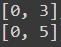

Dimana dari 8 x_validasi , terdapat 0 true positive dimana model melakukan kesalahan pada prediksi hasil positif pada output 1 , terdapat 3 true negative dimana model salah mengindentifikasi input sebagai output 1, lalu 0 false positive , dan berhasil memprediksi 5 dari false negative dimana berhasil memprediksi output 0. Sedangkan pada model log regression berasal dari sklearn menghasil akurasi 100% dengan confusion matrix sebagai berikut.

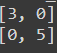

Model berhasil mendapatkan 3 true positive dan 5 false negative dari 8 x_validation. 

Dengan Demikian, model log regression dengan konsep gradient descent dapat memprediksi dengan cukup baik dengan 62.5% dengan berhasil memprediksi output 0 dengan sempurna. Menurut saya , hasil dapat dikembangkan dengan memperbanyak dataset training, epoch dan learning rate agar hasil maksimal.